In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import glob
import re

In [3]:
votes_df=pd.read_csv('./data/voter_numbers.csv')
votes_df['indep_votes'] = votes_df['indep_votes'].replace(np.nan, 0).astype(int)

In [4]:
def winner_tabulation(votes_df, realloc_df):
    votes_df['simulation_district']=realloc_df['DISTRICT']
    winners_df=pd.DataFrame(columns=['district', 'dem_votes', 'rep_votes','indep_votes', 'party_winner'])
    for i in range(1,5):
        winners_df.loc[i]=[i,
                      votes_df.loc[votes_df['simulation_district']==i]['dem_votes'].sum(),
                      votes_df.loc[votes_df['simulation_district']==i]['rep_votes'].sum(),
                    votes_df.loc[votes_df['simulation_district']==i]['indep_votes'].sum(),
                      '']
    for i in range(1,5):
        if votes_df.loc[votes_df['simulation_district']==i]['dem_votes'].sum()>votes_df.loc[votes_df['simulation_district']==i]['rep_votes'].sum():
            winners_df.loc[winners_df['district']==i,'party_winner']='D'
        else:
            winners_df.loc[winners_df['district']==i,'party_winner']='R'
    return winners_df

In [5]:
files = glob.glob('./allocation_by_county/*.csv')
file_name = './allocation_by_county/seed_{}_by_county.csv'
winners_list=[]
for i in range(len(files)):
    # realloc_df=pd.read_csv(file)
    iter_number=str(i).rjust(3,'0')
    realloc_df=pd.read_csv(file_name.format(iter_number))
    votes_df['simulation_district']=realloc_df['DISTRICT']
    winners=winner_tabulation(votes_df, realloc_df)
    dems=winners.loc[winners['party_winner']=='D'].shape[0]
    reps=winners.loc[winners['party_winner']=='R'].shape[0]
    winners_list.append([iter_number, dems, reps])

In [6]:
winners_list

[['000', 0, 4],
 ['001', 0, 4],
 ['002', 1, 3],
 ['003', 1, 3],
 ['004', 1, 3],
 ['005', 0, 4],
 ['006', 0, 4],
 ['007', 0, 4],
 ['008', 0, 4],
 ['009', 0, 4],
 ['010', 0, 4],
 ['011', 0, 4],
 ['012', 1, 3],
 ['013', 0, 4],
 ['014', 1, 3],
 ['015', 0, 4],
 ['016', 1, 3],
 ['017', 1, 3],
 ['018', 1, 3],
 ['019', 0, 4],
 ['020', 1, 3],
 ['021', 0, 4],
 ['022', 0, 4],
 ['023', 0, 4],
 ['024', 1, 3],
 ['025', 0, 4],
 ['026', 1, 3],
 ['027', 0, 4],
 ['028', 0, 4],
 ['029', 0, 4],
 ['030', 0, 4],
 ['031', 0, 4],
 ['032', 0, 4],
 ['033', 0, 4],
 ['034', 1, 3],
 ['035', 0, 4],
 ['036', 0, 4],
 ['037', 0, 4],
 ['038', 0, 4],
 ['039', 0, 4],
 ['040', 1, 3],
 ['041', 1, 3],
 ['042', 0, 4],
 ['043', 1, 3],
 ['044', 0, 4],
 ['045', 1, 3],
 ['046', 0, 4],
 ['047', 0, 4],
 ['048', 0, 4],
 ['049', 0, 4],
 ['050', 1, 3],
 ['051', 1, 3],
 ['052', 0, 4],
 ['053', 0, 4],
 ['054', 1, 3],
 ['055', 0, 4],
 ['056', 0, 4],
 ['057', 0, 4],
 ['058', 1, 3],
 ['059', 1, 3],
 ['060', 2, 2],
 ['061', 0, 4],
 ['062',

In [7]:
seat_share_df=pd.DataFrame(winners_list,columns=['iteration', 'dem_seats', 'rep_seats'])
seat_share_df

,iteration,dem_seats,rep_seats
0,000,0,4
1,001,0,4
2,002,1,3
3,003,1,3
4,004,1,3
...,...,...,...
245,245,0,4
246,246,0,4
247,247,1,3
248,248,2,2


(array([  7.,   0.,   0.,   0.,   0., 106.,   0.,   0.,   0., 137.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

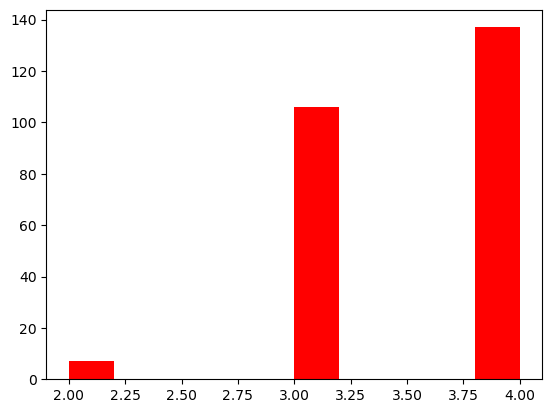

In [8]:
plt.hist(seat_share_df['rep_seats'],color="red")

In [9]:
votes_df

,county_id,NAME10,dem_votes,rep_votes,indep_votes,og_district,simulation_district
0,0,Adair,973,2166,0,3,2
1,1,Adams,510,1126,0,3,2
2,2,Allamakee,1932,3820,0,2,4
3,3,Appanoose,1412,3249,0,3,2
4,4,Audubon,633,1639,51,4,2
...,...,...,...,...,...,...,...
94,94,Winnebago,1303,2924,101,4,4
95,95,Winneshiek,4445,5135,0,2,4
96,96,Woodbury,9601,18234,533,4,3
97,97,Worth,1189,2031,0,2,4
